<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok: code breaks!! so i cannot check it!! but from presentation: cool map; do look at longer time periods like over 10,20,50 yrs; can also look at smaller units, say counties! and can look at different types of population say by national orign

The Purpose of the research:
The world has experienced many challenges in the recent past that have contributed to a significant shift in population. Despite being one of the most populated countries in the world, the United States was also hit by the covid-19 pandemic, which led to population changeas across the major states. Additionally, other factors like abortion could also play part in the dynamic shift of the US population. The purpose of the study is to investigate the population changes in the United States between 2021 and 2022        

In [3]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [4]:
!pip install mapclassify
import mapclassify #need for thematic map classification

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.2 MB/s eta 0:00:00


cb_2018_us_state_5m.cpg		    States_shapefile.cpg
cb_2018_us_state_5m.dbf		    States_shapefile.dbf
cb_2018_us_state_5m.prj		    States_shapefile.prj
cb_2018_us_state_5m.shp		    States_shapefile.shp
cb_2018_us_state_5m.shp.ea.iso.xml  States_shapefile.shx
cb_2018_us_state_5m.shp.iso.xml     United_States.zip
cb_2018_us_state_5m.shx		    US_States.zip
sample_data


<Axes: >

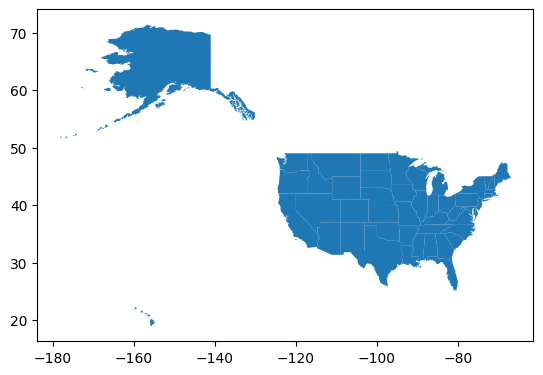

In [14]:
#Mapping the area of interest
! wget -q -O US_States.zip 'https://opendata.arcgis.com/api/v3/datasets/1b02c87f62d24508970dc1a6df80c98e_0/downloads/data?format=shp&spatialRefId=4326&where=1%3D1' #aok: error: was nj_counties

!ls

zip_ref = zipfile.ZipFile('United_States.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
United_States=gpd.read_file('States_shapefile.shp') #load the shapefile with gpd as US_States
#Make the map
United_States.plot()

In [15]:
#Loading the excel data
us_pop = '/content/NST-EST2022-POP.csv' #aok nooooo! i dont have this!!! error!!! need to download with wget
df = pd.read_csv(us_pop)
print(df)
print(df.columns)

#Change the string values to int
df['2021 population'] = df['2021 population'].str.replace(',', '').astype('int')
df['2022 population'] = df['2022 population'].str.replace(',', '').astype('int')
print(df.info())


FileNotFoundError: ignored

In [ ]:
#calculate the population change
df['population change'] = (df['2022 population'] - df['2021 population'])  / df['2022 population'] * 100
print(df)

print(US_States)
print(US_States.columns)
print(US_States['NAME'])

NameError: ignored

In [ ]:
#merging and joining the states to the data frame
US_States = pd.merge(
    left= US_States,
    right=df,
    left_on= 'NAME',
    right_on='State',
    how='outer',indicator=True,
        )
print(US_States.columns)

NameError: ignored

In [ ]:
print(US_States.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   STATEFP            56 non-null     object  
 1   STATENS            56 non-null     object  
 2   AFFGEOID           56 non-null     object  
 3   GEOID              56 non-null     object  
 4   STUSPS             56 non-null     object  
 5   NAME               56 non-null     object  
 6   LSAD               56 non-null     object  
 7   ALAND              56 non-null     int64   
 8   AWATER             56 non-null     int64   
 9   geometry           56 non-null     geometry
 10  State              51 non-null     object  
 11  2021 population    51 non-null     float64 
 12  2022 population    51 non-null     float64 
 13  population change  51 non-null     float64 
dtypes: float64(3), geometry(1), int64(2), object(8)
memory usage: 6.6+ KB
None


<Axes: >

Text(0.5, 1.0, 'Population Change in the U.S.A Between 2021 and 2022')

<function matplotlib.pyplot.show(close=None, block=None)>

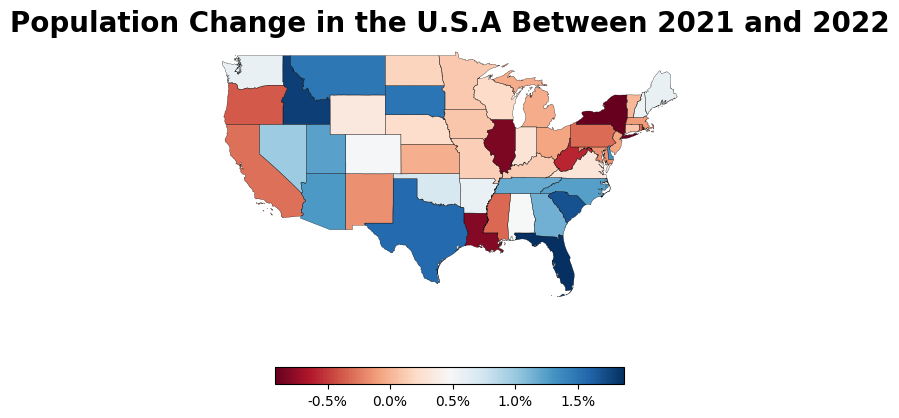

In [ ]:
US_States = US_States.dropna()
US_States = US_States[~US_States['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])] #Dropping areas outide the US
ax = US_States.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(15, 5))
US_States.plot(ax=ax, column='population change', legend=True, cmap='RdBu', legend_kwds={'shrink':0.3,
 'orientation': 'horizontal', 'format': '%.1f%%'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Population Change in the U.S.A Between 2021 and 2022', size=20, weight='bold')
plt.show

**Interpretation**

 The map shows that Florida and Idaho were the leading countries that recorded the highest population increase between 2021 and 2022, which was slight above 1.5%. Alternatively, New York, Illinois and Lousiana experienced a significant decline in population in the United States. A further investigation is, therefore, necessary to establish the reasons behind the rise and fall of population among the respective states.

 **Resources:**
https://www.census.gov/data/datasets/time-series/demo/popest/2020s-national-total.html

https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html